<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo II: Aprendizaje No supervizado: Kmeans


## Introducción


K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

**¿Cómo funciona?**

El algoritmo trabaja iterativamente para asignar a cada “muestra” uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:


> Los `“centroids”` de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos qu>e se utilizarán para poder etiquetar nuevas muestras.

> `Etiquetas` para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Casos de Uso de K-Means

Algunos casos de uso son:

> **Segmentación por Comportamiento:** relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.

> **Categorización de Inventario:** agrupar productos por actividad en sus ventas
Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal


## Algoritmo K-means

El algoritmo utiliza una proceso **iterativo** en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo deberemos pasar como entrada el `conjunto de datos` y un valor de `K`. El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroids serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

> 1.- **Paso de asignación** $argmin_{c_i \in C} dist(c_i, x)^2$

> 2.- **Paso de actualización del Centroide**  En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior. $c_i = \frac{1}{|s_i|}\sum_{x_i \in s_i} x_i$

El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
*  si no hay cambios en los puntos asignados a los grupos,
* o si la suma de las distancias se minimiza,
* o se alcanza un número máximo de iteraciones.

El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.



## Criterios de Elección de Grupos

> Criterio del codo

> Criterio del gradiente

## Ejemplo 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
#%% Generar datos aleatorios
X, Y = make_blobs(n_samples = 1500, random_state = 5)


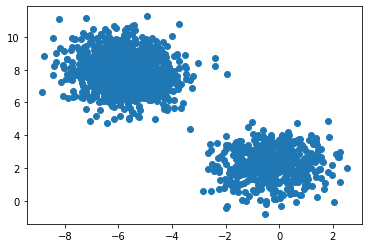

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
#%% Aplicar el algoritmo Kmeans
model = KMeans(n_clusters = 8, random_state = 5, init="random")
model = model.fit(X)
grupos = model.predict(X)
centroides = model.cluster_centers_


In [5]:
grupos

array([3, 4, 1, ..., 7, 0, 5], dtype=int32)

In [6]:
centroides

array([[-6.94144353,  8.35502307],
       [ 0.57412011,  2.95741008],
       [-1.38964857,  1.29874969],
       [-4.69672866,  7.45247368],
       [-5.5019193 ,  9.06851726],
       [ 0.36465092,  1.3843521 ],
       [-1.04024394,  2.94768854],
       [-6.14831077,  6.75366517]])

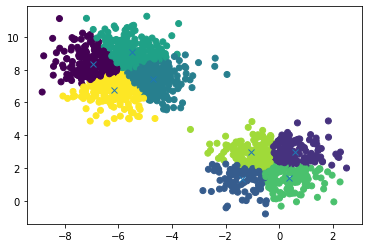

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c= grupos)
plt.plot(centroides[:,0],centroides[:,1], 'x')
plt.show()

In [8]:
model.inertia_

1118.5244507130396

Text(0, 0.5, 'Inercial')

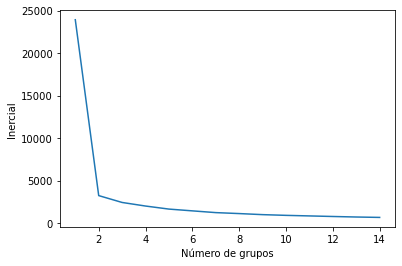

In [9]:
#%% Criterio de selección del codo
ngroup = 15
inercias = np.zeros(ngroup)

for k in np.arange(1,ngroup):
    model = KMeans(n_clusters = k, random_state = 5, init='random')
    model = model.fit(X)
    inercias[k] = model.inertia_

plt.figure(figsize=(6,4))
plt.plot(np.arange(1,ngroup),inercias[1:])
plt.xlabel('Número de grupos')
plt.ylabel('Inercial')


In [10]:
#%% Función del Criterio de selección del codo kmeans

def criterio_codo_kmeans(ngroup, data):
    inercias = np.zeros(ngroup)

    for k in np.arange(1,ngroup):
        model = KMeans(n_clusters = k, random_state = 5, init='random')
        model = model.fit(data)
        inercias[k] = model.inertia_

    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,ngroup),inercias[1:])
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercial')


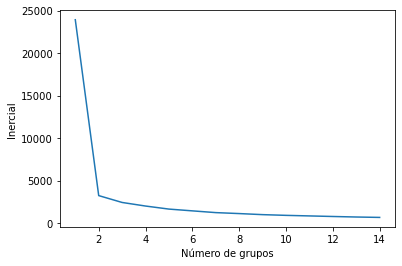

In [11]:
ngroup = 15
criterio_codo_kmeans(ngroup, X)

In [12]:
# Criterio del gradiente, (Tarea: método para su librería de cdin que me calcule el crterio del gradiente)

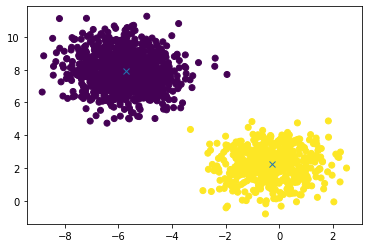

In [13]:
#%% Definiendo el número de grupos optimos
#%% Aplicar el algoritmo Kmeans con 2 grupos

model_opt = KMeans(n_clusters = 2, random_state = 5, init='random')
model_opt = model_opt.fit(X)
centroides_opt = model_opt.cluster_centers_
grupos_opt = model_opt.predict(X)

plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c= grupos_opt)
plt.plot(centroides_opt[:,0],centroides_opt[:,1], 'x')
plt.show()

## Ejemplo 2

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import pandas as pd

In [15]:
#%% Leer los datos
data = pd.read_csv('../Data/creditcard_sample.csv')

#%% drop de columnas time y class
data = data.drop(['Time', 'Class'], axis=1)

#%% Estandarizar los datos
data_credit_std = (data - data.mean(axis=0))/data.std(axis=0)


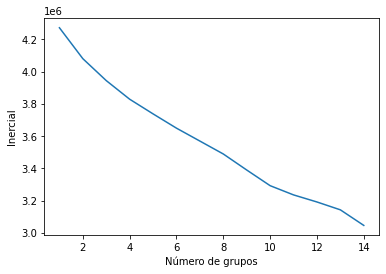

In [16]:
#%% Aplicar el algoritmo de clustering
# Aplicar el criterio de selección del codo
criterio_codo_kmeans(15,data_credit_std)

In [17]:
# plot de las inercias


In [18]:
#%% Ejecutar el algoritmo con k = 11
model_opt = KMeans(n_clusters = 11, random_state = 5, init='random')
model_opt = model_opt.fit(data_credit_std)
centroides_opt = model_opt.cluster_centers_
grupos_opt = model_opt.predict(data_credit_std)



In [19]:
data_credit_std.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.290000,0.604160,-0.049141,0.796035,0.741598,-0.664231,-0.040072,-0.613970,0.124673,0.738044,...,-0.135155,0.295977,0.910476,-0.220186,-0.196299,0.799359,-0.460405,0.178504,0.110047,-0.289386
1,0.489198,-0.662397,-0.026838,1.214931,-0.455277,0.843226,0.249252,0.326148,-0.002980,-0.112856,...,0.056865,-0.282628,-0.347838,0.557905,0.278769,0.985580,-0.918177,-0.293333,-0.682829,-0.344407
2,-0.490546,-1.425026,-1.177777,0.185336,-0.232622,1.298839,-1.609511,-0.294097,0.396696,-0.796249,...,0.946258,0.110328,-1.558713,0.302773,0.040158,-0.836174,1.000711,-0.264306,-1.064450,-0.021466
3,1.292835,0.959213,-0.759953,0.144079,-0.251146,-1.157096,-0.148473,-1.024347,0.000082,0.042140,...,-0.333339,-0.041433,0.392248,0.535914,1.954280,-1.423852,1.088065,0.019467,0.004063,0.076775
4,0.565885,0.647227,-0.489917,0.060663,2.871443,-0.355443,0.909822,-0.318506,0.296037,-0.124784,...,0.341421,-0.063771,-0.831917,0.153841,-0.871540,-1.114755,-0.665506,-0.057102,0.022817,0.777835


In [20]:
#%% Obtener los centroides


Text(0.5, 0.92, 'Clusters de credit card')

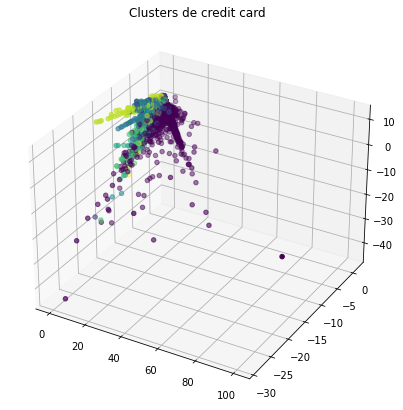

In [21]:
# Eligiendo 3 variables para plotear 

# Creating figure
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

# Creating plot
ax.scatter3D(data_credit_std.values[:,-1], data_credit_std.values[:,1], data_credit_std.values[:,2], c=grupos_opt)
plt.title('Clusters de credit card')

## Ejemplo 2

Tiene un centro comercial de supermercado y, a través de las tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como ID de cliente, edad, sexo, ingresos anuales y puntaje de gastos.

Usted es el propietario del centro comercial y desea comprender a sus clientes. Desea saber quienes clientes pueden ser clientes objetivos para que el equipo de marketing planifique una campaña.

**¿Quiénes son sus clientes objetivo con los que puede iniciar la estrategia de marketing?**

Para responder la pregunta anterior necesitamos realizar lo siguiente:

>1.- data quality report dqr 

>2.- Limpieza de datos

>3.- Analisis exploratorio de datos EDA

>4.- Aplicar el criterio de selección de grupos -> el número opt de grupos

>5.- Aplican kmeans con el num opt de grupos

>6.- Conclusiones o comentarios acerca de los resultados

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from CDIN import CDIN as cd


In [23]:
#%% Leer los datos
data_customer = pd.read_csv('../Data/Mall_Customers.csv')

In [24]:
data_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
#%% 1.- data quality report dqr
report_customer = cd.dqr(data_customer)
report_customer

,Nombres,Tipo_Dato,Datos_Faltantes,Valores_Presentes,Num_Valores_Unicos,Min,Max,Categorica
CustomerID,CustomerID,int64,0,200,200,1,200,False
Gender,Gender,object,0,200,2,Female,Male,True
Age,Age,int64,0,200,51,18,70,False
Annual Income (k$),Annual Income (k$),int64,0,200,64,15,137,False
Spending Score (1-100),Spending Score (1-100),int64,0,200,84,1,99,False


In [26]:
#%% 2.- Limpieza de datos

<AxesSubplot:>

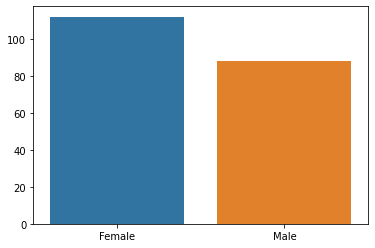

In [27]:
#%% 3.- EDA
## 1er insight
sexo_customers = data_customer['Gender'].value_counts()
plt.figure()
sns.barplot(x=sexo_customers.index, y = sexo_customers.values)

In [28]:
## 2do insight (rango de edades)
edad_18_25 = data_customer['Age'][(data_customer['Age']>=18) & (data_customer['Age']<25)]
edad_25_35 = data_customer['Age'][(data_customer['Age']>=25) & (data_customer['Age']<35)]
edad_35_45 = data_customer['Age'][(data_customer['Age']>=35) & (data_customer['Age']<45)]
edad_45_55 = data_customer['Age'][(data_customer['Age']>=45) & (data_customer['Age']<55)]
edad_55_mas = data_customer['Age'][(data_customer['Age']>=55)]



In [29]:
x = ['18-24', '25-34', '35-44', '45-54', '55+']
y = [len(edad_18_25), len(edad_25_35), len(edad_35_45), len(edad_45_55), len(edad_55_mas)]

Text(0, 0.5, 'Número de clientes')

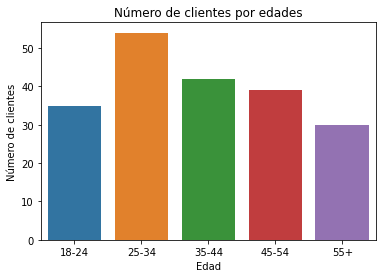

In [30]:
plt.figure()
sns.barplot(x=x, y = y)
plt.title('Número de clientes por edades')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')

In [31]:
data_customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

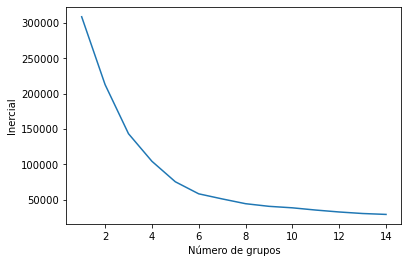

In [33]:
#%% 4.- Aplicar el criterio de selección de grupos
X_data = data_customer.iloc[:,[2,3,4]] # elgiendo age, anual income, spending score

criterio_codo_kmeans(15,X_data)

In [34]:
# Visualizando el criterio del codo, se observa que con 5 grupos
# se puede obtener una buena clasificación

In [35]:
#%% 5.- Aplica kmeans con el num opt de grupos
model_opt = KMeans(n_clusters = 5, random_state = 5, init='random')
model_opt = model_opt.fit(X_data)
centroides_opt = model_opt.cluster_centers_
grupos_opt = model_opt.predict(X_data)



In [36]:
grupos_opt

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [37]:
X_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Text(0.5, 0.92, 'Clusters de Customer Mall')

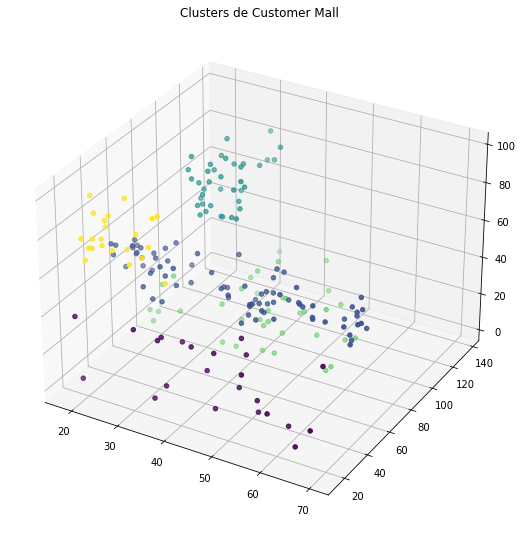

In [38]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig=plt.figure(figsize=(10,7))
ax = Axes3D(fig)
# ax=plt.axes(projection='3d')

# Creating plot
ax.scatter3D(X_data.iloc[:,0], X_data.iloc[:,1], X_data.iloc[:,2], c=grupos_opt)
plt.title('Clusters de Customer Mall')



Text(0.5, 0.92, 'Clusters de Customer Mall')

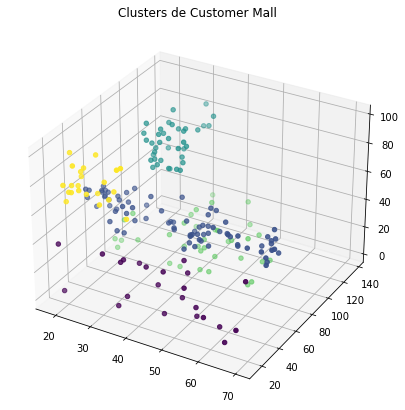

In [39]:
#%% 6.- Conclusiones o comentarios acerca de los resultados
# Visualizar todos los clusters
# Creating figure
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

# Creating plot
ax.scatter3D(X_data.iloc[:,0], X_data.iloc[:,1], X_data.iloc[:,2], c=grupos_opt)
plt.title('Clusters de Customer Mall')

In [40]:
centroides_opt

array([[45.2173913 , 26.30434783, 20.91304348],
       [42.9375    , 55.0875    , 49.7125    ],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [25.27272727, 25.72727273, 79.36363636]])

## Actividad 3

Agrupar usuarios Twitter de acuerdo a su personalidad con K-means.

>1.- data quality report dqr 

>2.- Limpieza de datos

>3.- Analisis exploratorio de datos EDA (obtener al menos 3 insights)

>4.- Aplicar el criterio de selección de grupos -> el número opt de grupos

>5.- Aplican kmeans con el num opt de grupos

>6.- Graficar, concluir y comentar acerca de los resultados.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D


In [42]:
#Leer datos twiter_analisis.csv


In [43]:
##  tabla de información estadística que nos provee Pandas dataframe:


In [44]:
# dqr del dataframe


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1-> Actor/actriz

2->Cantante

3->Modelo

4->Tv, series

5->Radio

6->Tecnología

7->Deportes

8->Politica

9->Escritor


In [45]:
## Histogramas


Las variables que nos pueden servir para la agrupación pueden ser `["op","ex","ag"]`

In [ ]:
# Crear la figura


# Plotear


## Elección de los grupos óptimos

Vamos a hallar el valor de K mediante el criterio del codo


In [ ]:
# Criterio del codo

# plot de las inercias


Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

In [ ]:
#Aplicar kmeans con el num opt de grupos


### Clasificar nuevas muestras


 podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. 

In [ ]:
## Obtener el grupo de una nueva muestra

# Ejemplo 4

In [47]:
## Importatr digitos
from sklearn.datasets import load_digits

digits = load_digits()


In [63]:
digits.data.shape

(1797, 64)

In [65]:
digits_mat = digits.data.reshape(1797,8,8)
digits_mat

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [66]:
digits_mat[1,:,:]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

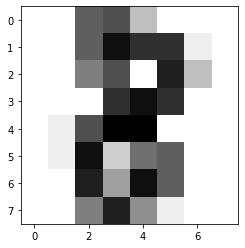

In [75]:
plt.imshow(digits_mat[28,:,:], cmap=plt.cm.binary)

In [57]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [51]:
kmeans = KMeans(n_clusters = 10,random_state=0)
clusters = kmeans.fit_predict(digits.data)
centroides = kmeans.cluster_centers_

In [53]:
centroides.shape

(10, 64)

In [54]:
centroides = centroides.reshape(10,8,8)

In [55]:
centroides

array([[[ 0.00000000e+00,  1.11022302e-16,  3.07228916e-01,
          7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
          1.50602410e-01,  5.42168675e-02],
        [ 1.73472348e-18,  1.20481928e-02,  3.28313253e+00,
          1.37951807e+01,  8.46385542e+00,  1.53012048e+00,
          9.75903614e-01,  2.77108434e-01],
        [ 8.67361738e-19,  6.44578313e-01,  1.07108434e+01,
          1.15602410e+01,  4.33734940e+00,  5.25903614e+00,
          3.87349398e+00,  3.25301205e-01],
        [ 6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
          5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
          6.21686747e+00,  1.80722892e-02],
        [ 0.00000000e+00,  8.92771084e+00,  1.48072289e+01,
          9.35542169e+00,  1.28132530e+01,  1.43915663e+01,
          5.48192771e+00,  0.00000000e+00],
        [ 9.63855422e-02,  6.50602410e+00,  1.16867470e+01,
          1.23433735e+01,  1.48373494e+01,  1.07590361e+01,
          1.56626506e+00,  0.00000000e+00],
        [ 6.0240

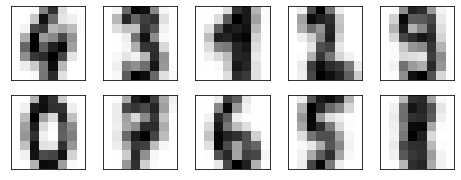

In [62]:
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest',cmap=plt.cm.binary)

In [ ]:
# Cluster por Kmeans